<font size="10"> Credit Card Fraud Detection EDA </font>

__MODULES and PACKAGES__

In [1]:
# all import statements
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import math
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

__Version of Packages__

In [2]:
print("Pandas Version: Pandas", pd.__version__)
print("Numpy Version: Numpy", np.__version__)
print("Matplotlib Version: Matplotlib", matplotlib.__version__)
print("Seaborn Version: Seaborn", sns.__version__)

Pandas Version: Pandas 1.0.1
Numpy Version: Numpy 1.18.1
Matplotlib Version: Matplotlib 3.1.3
Seaborn Version: Seaborn 0.10.0


__Pandas Dataframe__ 

In [3]:
#import data
df=pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#dimensions
df.shape

(284807, 31)

In [5]:
# a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#stat
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#checking missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#duplicate data
print(df.duplicated().sum())
df[df.duplicated(keep='first')]

1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
#drop duplicates
print(len(df.drop_duplicates())/len(df))
df = df.drop_duplicates()
df.reset_index()
df

0.996204447222154


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
#class Imbalance
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [11]:
#total time estimation
df['Time'].max()/(60*60)
#approx. 48 hours of transaction data 

47.99777777777778

__Frequency Distribution of Time__

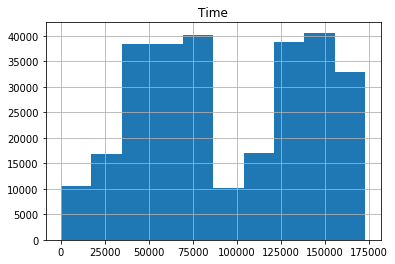

In [12]:
df.hist('Time')
plt.show()

In [13]:
#amout distribution and statistics
print(df['Amount'].value_counts(normalize=True))
print("*********************")
df['Amount'].describe()

1.00       0.047814
1.98       0.021302
0.89       0.017168
9.99       0.016699
15.00      0.011560
             ...   
362.97     0.000004
241.71     0.000004
462.78     0.000004
337.41     0.000004
1080.06    0.000004
Name: Amount, Length: 32767, dtype: float64
*********************


count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
#Fraud and Non Fraud transaction Amount stat
print(df[df['Class']==1]['Amount'].describe())
print("*********************")
df[df['Class']==0]['Amount'].describe()
#mean

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
*********************


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
#time amount and class stat
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


__Outliers__

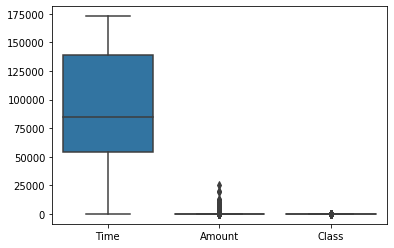

In [16]:
# checking outliers in all three major columns (V1 to V28 columns are ignored)
sns.boxplot(data=df[['Time','Amount','Class']])
plt.show()

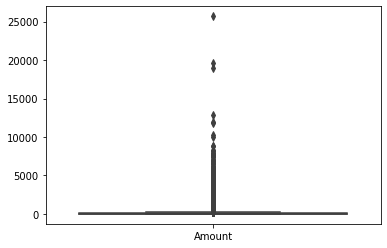

In [17]:
# outliers in amount column
sns.boxplot(data=df[['Amount']])
plt.show()

In [18]:
df[df['Class']==1]['Amount']

541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 473, dtype: float64

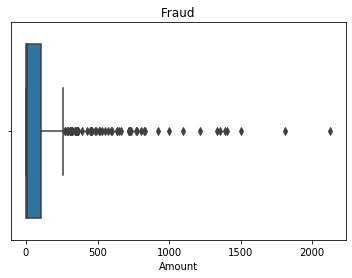

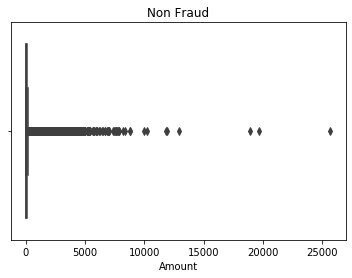

In [19]:
#outliers in amount column with fraud and non fraud
sns.boxplot(df[df['Class']==1]['Amount'])
plt.title("Fraud")
plt.show()
sns.boxplot(df[df['Class']==0]['Amount'])
plt.title("Non Fraud")
plt.show()

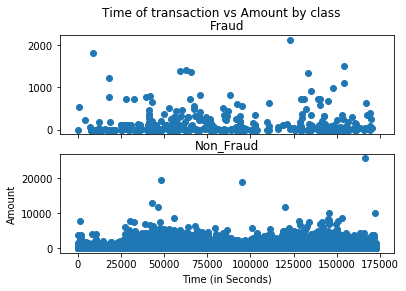

In [20]:
Fraud = df[df['Class']==1] 
Non_Fraud = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Time of transaction vs Amount by class') 
ax1.scatter(Fraud.Time, Fraud.Amount) 
ax1.set_title('Fraud') 
ax2.scatter(Non_Fraud.Time, Non_Fraud.Amount) 
ax2.set_title('Non_Fraud') 
plt.xlabel('Time (in Seconds)') 
plt.ylabel('Amount') 
plt.show()

In [21]:
#Finding outliers
def indicies_of_outliers(x): 
    q1, q3 = np.percentile(x, [25, 75]) 
    iqr = q3 - q1 
    lower_bound = q1 - (iqr * 1.5) 
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

In [22]:
#number and percentage of outliers in amount with fraud class
print(len(indicies_of_outliers(df[df['Class']==1]['Amount'])[0]))
len(indicies_of_outliers(df[df['Class']==1]['Amount'])[0])/len(df)

67


0.00023614332137343775

In [23]:
#number and percentage of outliers in amount with non fraud class
print(len(indicies_of_outliers(df[df['Class']==0]['Amount'])[0]))
len(indicies_of_outliers(df[df['Class']==0]['Amount'])[0])/len(df)

31621


0.11144907410670858

In [24]:
#number and percentage of outliers in amount 
print(len(indicies_of_outliers(df['Amount'])[0]))
len(indicies_of_outliers(df['Amount'])[0])/len(df)

31685


0.11167464384652799

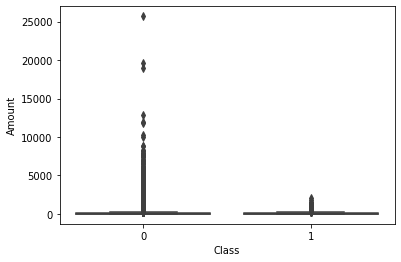

In [25]:
# Final outliers plot
sns.boxplot(x ="Class",y="Amount",data=df)
plt.show()

In [26]:
#Outliers Removal
def outlier_removal(max_val):
    print("Values Lost on the basis of MAX based Removal : {}".format(len(df[(df['Class']==0) &(df['Amount']>max_val)])))
    print("Proportion of Data Lost : {}".format(len(df[(df['Class']==0) &(df['Amount']>max_val)])/len(df)))
    temp_df = df[df['Amount']<max_val] # Outlier Removed DF
    print(temp_df['Class'].value_counts(normalize = True))

In [27]:
#putting the threshold 3000 as per box plot
outlier_removal(3000)

Values Lost on the basis of MAX based Removal : 284
Proportion of Data Lost : 0.0010009657204486017
0    0.998331
1    0.001669
Name: Class, dtype: float64


In [28]:
#df update
df = df[df['Amount']<3000]

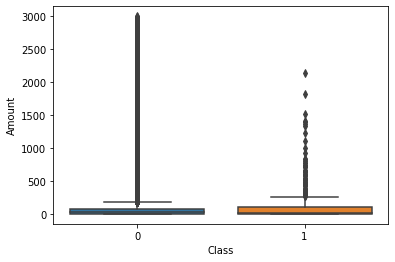

In [29]:
#boxplot without outliers
sns.boxplot(x ="Class",y="Amount",data=df)
plt.show()

__Observations__

__Visualization for Amount Column__

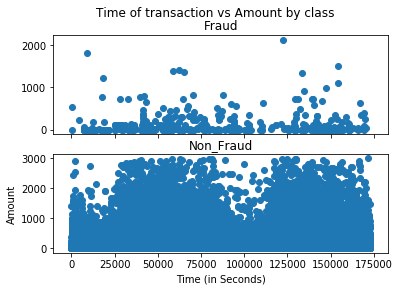

In [30]:
Fraud = df[df['Class']==1] 
Non_Fraud = df[df['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Time of transaction vs Amount by class') 
ax1.scatter(Fraud.Time, Fraud.Amount) 
ax1.set_title('Fraud') 
ax2.scatter(Non_Fraud.Time, Non_Fraud.Amount) 
ax2.set_title('Non_Fraud') 
plt.xlabel('Time (in Seconds)') 
plt.ylabel('Amount') 
plt.show()
#given the threashold 3000 in the amount column

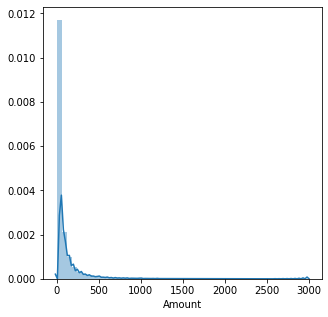

In [31]:
# distrubution plot of Amount column
# distplot in python
# histogram with a line
plt.figure(figsize = (5,5))
sns.distplot(df['Amount'])
plt.show()

In [32]:
# create a column Hour based on Time
df['hour'] = df['Time']/(60*60)
np.round(df['hour']).astype(int)
df.reset_index(drop = True , inplace = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


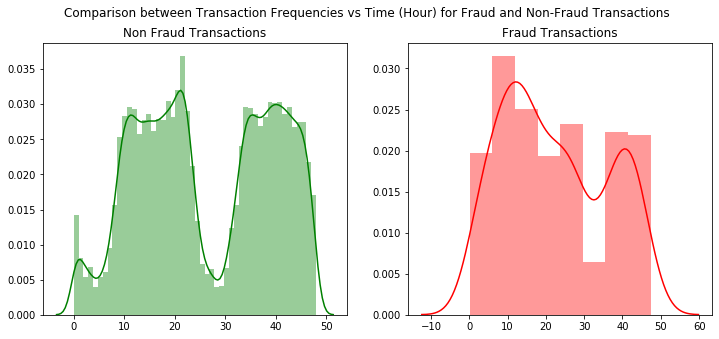

In [33]:
# Time plots 
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12,5))
sns.distplot(df[df['Class']==0]['hour'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Non Fraud Transactions')
sns.distplot(df[df['Class']==1]['hour'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')
fig.suptitle('Comparison between Transaction Frequencies vs Time (Hour) for Fraud and Non-Fraud Transactions')
plt.show()

In [34]:
# Covert the hour column daily to single day
df['day'] = df['hour']/24
np.round(df['day']).astype(int)
df.reset_index(drop = True , inplace = True)
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
283432,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.996111,1.999838
283433,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.996389,1.999850
283434,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.996667,1.999861
283435,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.996667,1.999861
283436,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,47.997778,1.999907


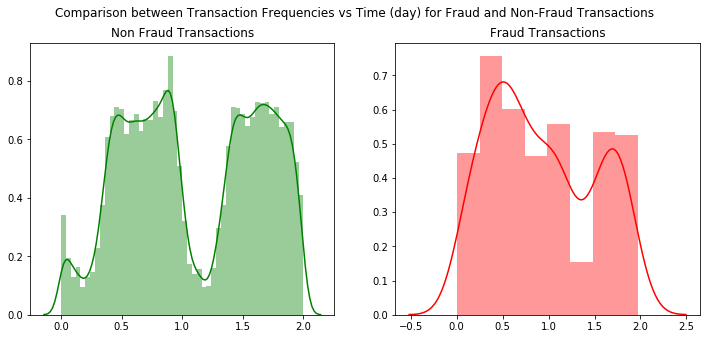

In [35]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12,5))
sns.distplot(df[df['Class']==0]['day'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Non Fraud Transactions')
sns.distplot(df[df['Class']==1]['day'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')
fig.suptitle('Comparison between Transaction Frequencies vs Time (day) for Fraud and Non-Fraud Transactions')
plt.show()

__Observation class column__

__Visualization for Class Column__

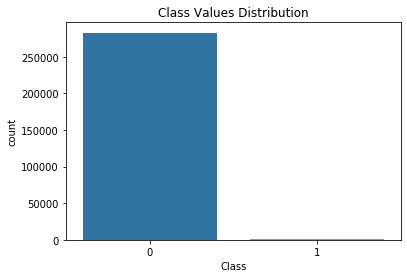

In [36]:
#Distribution of Class Column
plt.figsize = (20,20)
sns.countplot(df['Class']) # Highly Skewed , Imbalanced Data
plt.title('Class Values Distribution')
plt.show()

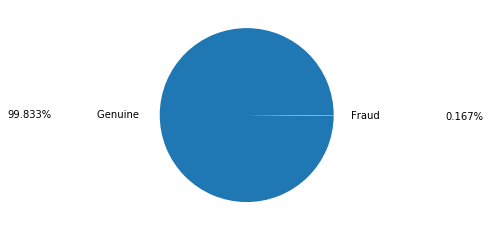

In [37]:
# Pie chart to plot the Class Imbalance
labels = ['Genuine ','Fraud ']
plt.pie(df['Class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)
plt.show()

In [38]:
#distribution of class column 
df['Class'].value_counts()

0    282964
1       473
Name: Class, dtype: int64

In [39]:
per_of_class_1 = df['Class'].value_counts()[1] / len(df)
print("Skew Percentage , Less Dominant Class : {}".format(per_of_class_1))

Skew Percentage , Less Dominant Class : 0.0016688011798036248


# Visualising Data for detecting any particular Pattern or Anomaly using Histogram Plots

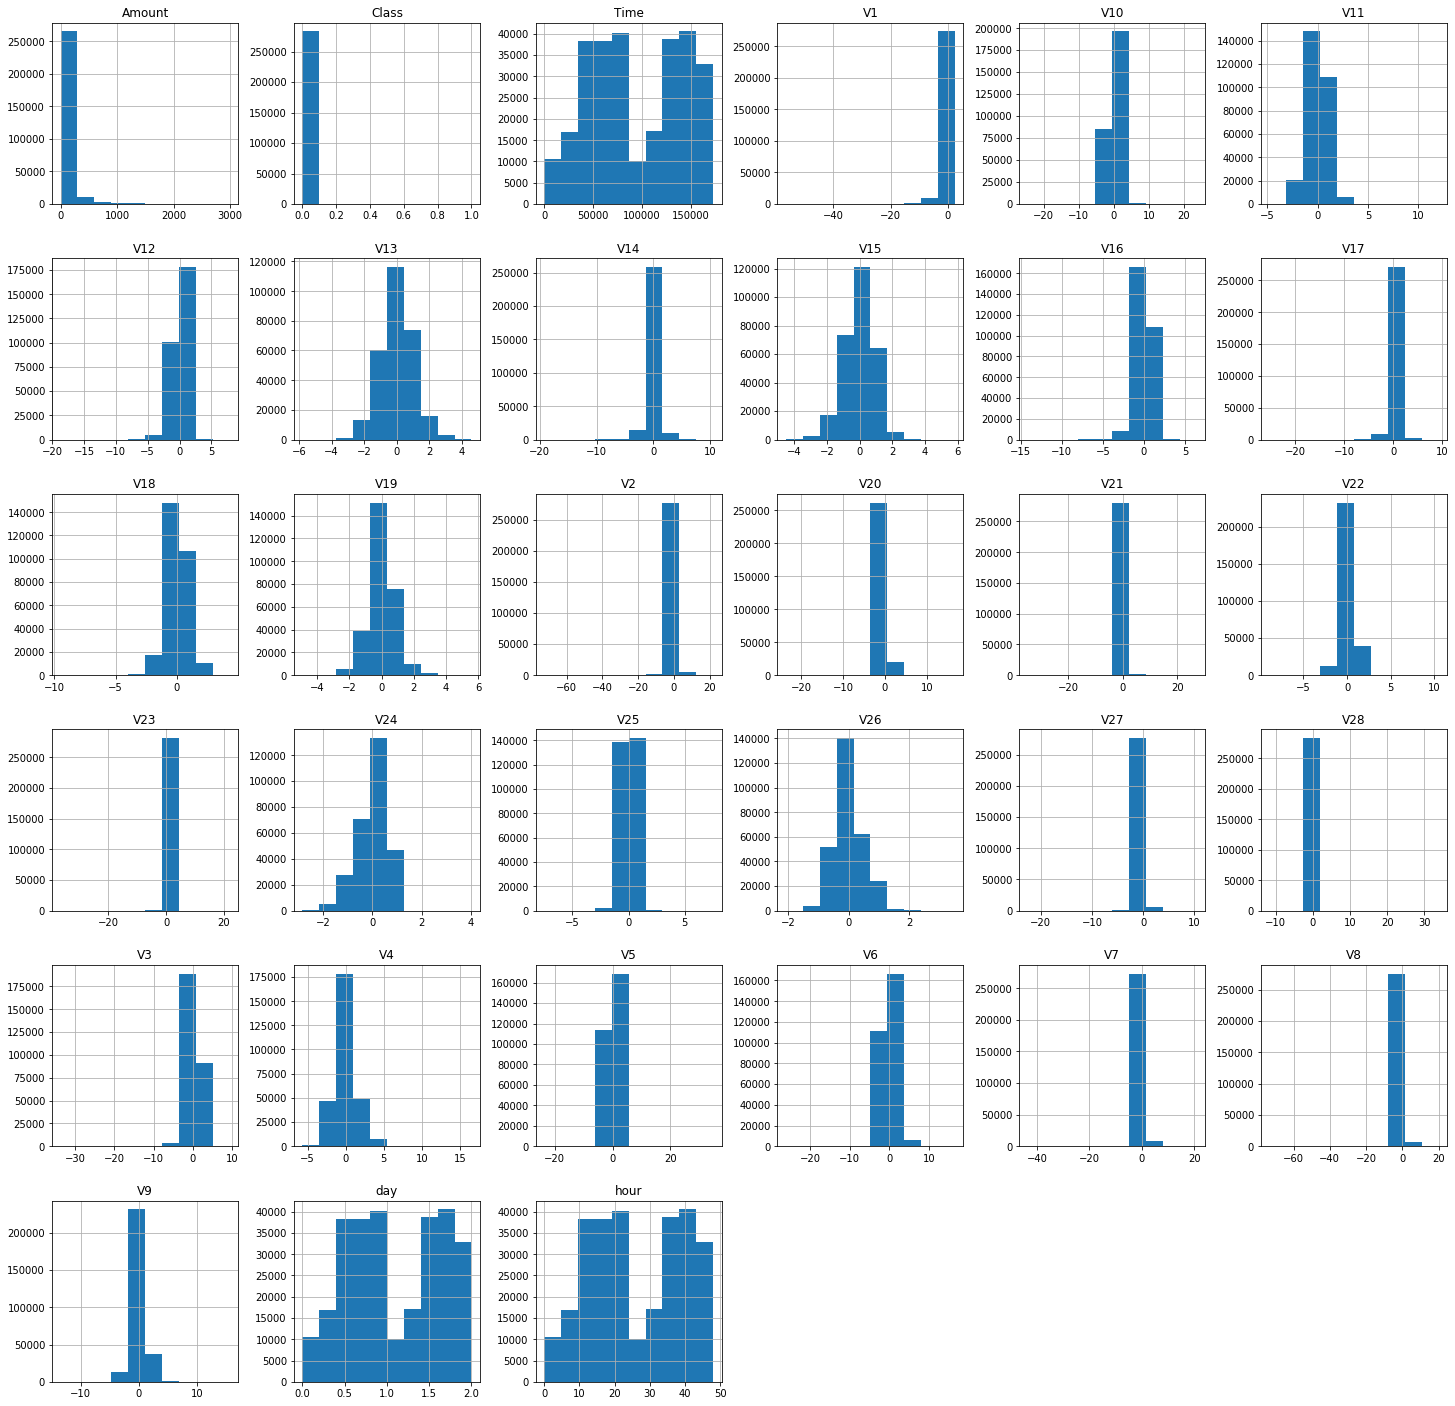

In [40]:
df.hist(figsize = (25,25))
plt.show()

In [41]:
#corr relation
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
Time,1.000000,0.119689,-0.011263,-0.426944,-0.106239,0.182270,-0.064856,0.091296,-0.038463,-0.007853,...,0.056018,-0.015849,-0.235236,-0.041860,-0.005603,-0.009647,-0.013060,-0.012368,1.000000,1.000000
V1,0.119689,1.000000,-0.044993,-0.033046,0.017213,-0.045123,0.021563,0.040904,-0.012681,0.000480,...,-0.014541,0.000907,-0.005441,-0.002666,-0.005866,-0.006324,-0.176621,-0.096099,0.119689,0.119689
V2,-0.011263,-0.044993,1.000000,-0.036112,0.026403,-0.048062,0.026879,0.085778,-0.011252,-0.004271,...,-0.027592,0.002402,-0.014913,-0.005659,0.008395,0.007769,-0.491436,0.088474,-0.011263,-0.011263
V3,-0.426944,-0.033046,-0.036112,1.000000,0.014994,-0.051313,0.024403,0.043531,-0.014595,-0.005815,...,-0.014861,0.002189,-0.004385,-0.000992,0.009456,-0.004818,-0.157559,-0.184746,-0.426944,-0.426944
V4,-0.106239,0.017213,0.026403,0.014994,1.000000,0.019283,-0.010494,-0.019281,0.005608,0.003362,...,0.008349,-0.000921,0.003864,0.002116,-0.001080,-0.000499,0.061771,0.130013,-0.106239,-0.106239
V5,0.182270,-0.045123,-0.048062,-0.051313,0.019283,1.000000,0.064676,0.117024,-0.027151,-0.006545,...,-0.009172,0.005289,-0.001458,0.001876,0.045203,-0.023027,-0.314452,-0.092637,0.182270,0.182270
V6,-0.064856,0.021563,0.026879,0.024403,-0.010494,0.064676,1.000000,-0.078394,0.021197,0.002440,...,0.000450,-0.001363,-0.000295,-0.001524,-0.033473,0.014972,0.164030,-0.044686,-0.064856,-0.064856
V7,0.091296,0.040904,0.085778,0.043531,-0.019281,0.117024,-0.078394,1.000000,0.025215,0.002364,...,-0.003521,-0.005058,-0.002167,-0.000800,-0.059562,0.024776,0.284516,-0.185244,0.091296,0.091296
V8,-0.038463,-0.012681,-0.011252,-0.014595,0.005608,-0.027151,0.021197,0.025215,1.000000,0.000750,...,-0.013082,0.002548,-0.003525,-0.001238,0.019148,-0.005857,-0.076500,0.033196,-0.038463,-0.038463
V9,-0.007853,0.000480,-0.004271,-0.005815,0.003362,-0.006545,0.002440,0.002364,0.000750,1.000000,...,0.010184,-0.000453,0.001251,0.001149,0.007325,0.004120,-0.042026,-0.094160,-0.007853,-0.007853


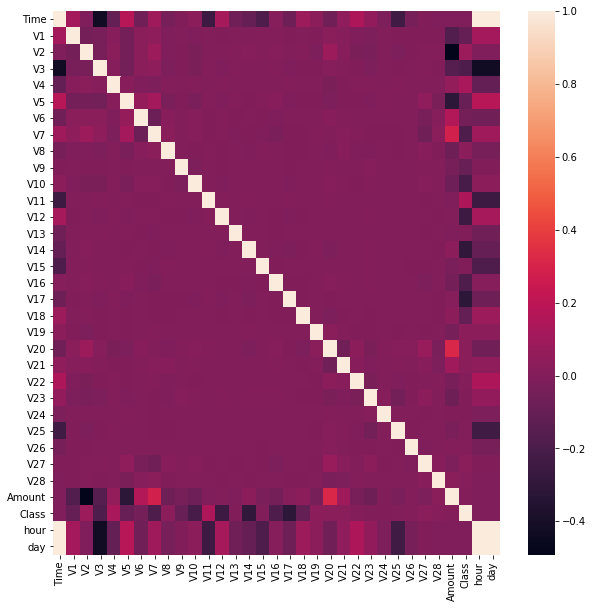

In [42]:
# Plotting a Correlation Plot to observe any correlations or patterns
corr_matrix = df.corr()
plot = plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix) # seaborn Library
plt.show()

__Observations__ 

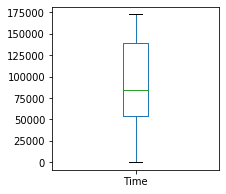

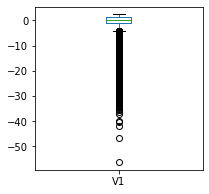

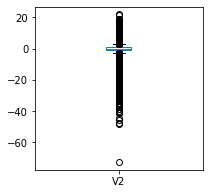

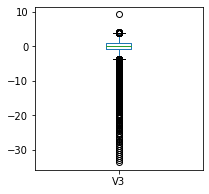

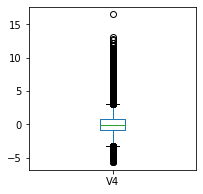

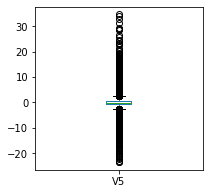

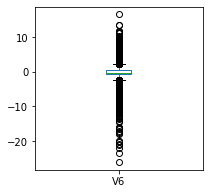

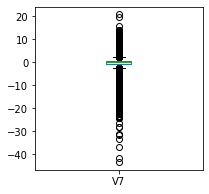

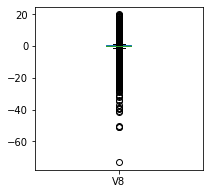

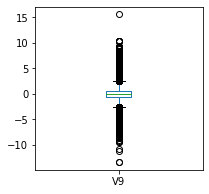

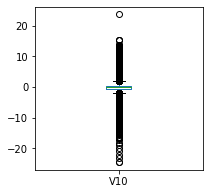

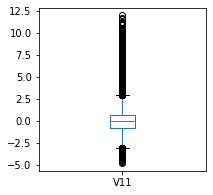

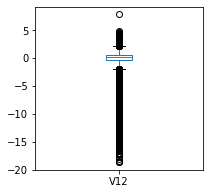

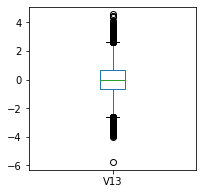

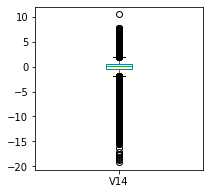

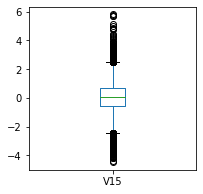

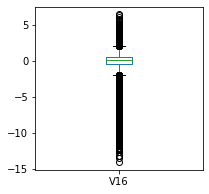

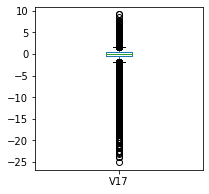

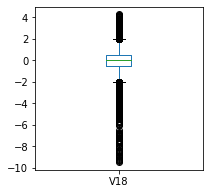

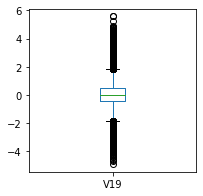

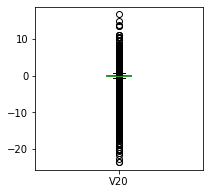

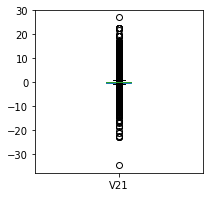

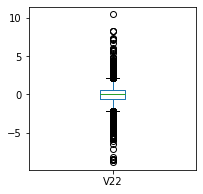

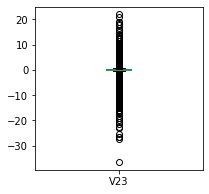

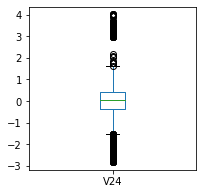

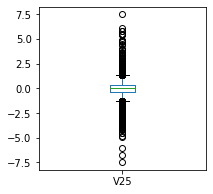

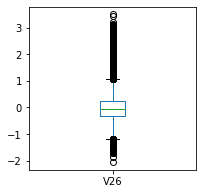

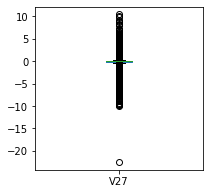

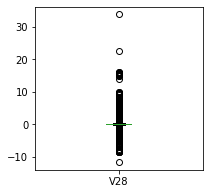

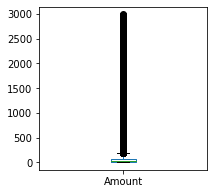

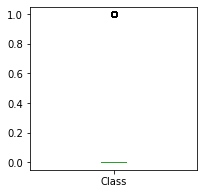

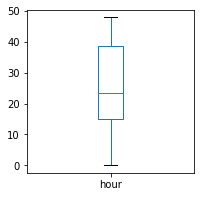

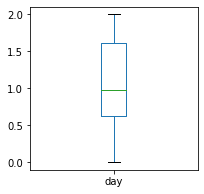

In [43]:
# Finally let's also plot a box plot for observing if columns have some outliers
for col in df.columns:
    plt.figure(figsize = (3,3))
    df[col].plot(kind = 'box')

In [44]:
# amonut vs time
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,0.000012
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,0.000012
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,0.000023


In [45]:
df['hour'] = df['hour'].astype(int)+1
df['hour'] = df['hour']%24
df[['Amount','hour','Class']].groupby(['hour','Class']).agg({'Amount':'mean'})

Amount
hour Class            
0    0       65.025843
     1      139.879412
1    0       58.433797
     1      303.345000
2    0       62.612368
     1      127.932000
3    0       62.095177
     1       78.190833
4    0       51.947772
     1       13.759412
5    0       67.986108
     1       67.313043
6    0       49.288152
     1      128.788182
7    0       61.289029
     1      111.924444
8    0       65.369144
     1      119.903478
9    0       85.125253
     1       47.887778
10   0       94.991917
     1       78.463125
11   0      103.745765
     1      293.701250
12   0      102.731822
     1      123.976038
13   0      100.267313
     1      200.384706
14   0       93.351604
     1      129.087059
15   0       96.625608
     1      158.309565
16   0       96.371583
     1       85.926538
17   0       97.867127
     1      204.793182
18   0       93.456649
     1      120.425357
19   0       74.515593
     1      226.433571
20   0       75.668625
     1      111.296316
21   0       71.502660
     1       83.911667
22   0       71.444573
     1       64.343750
23   0       66.700435
     1      160.222222

# Common Preprocessing Steps 

1. __Identify and Handle Null Values__ : ?/ NaN / NULL / Blank
    i. Drop values df.dropna(axis = 0/1 , inplace , subset=['col'] )
    ii. Replace with Mean , Mode or any other logical values as needed
2. __Data Formatting and Standardising data types__ : Calcutta / Kolkata , String Values for Price
    i. df['col'] = df['col'].astype('int / float')
    ii. Use dictionaries for Standardising
3. __Data Normalisation and Scaling__ : Age vs Salary Variability
    i. StandardScaler() , RobustScaler() , Fix Mean to 0 and Variance to 1
4. __Binning Data for better Aggragation , Segmentation and Analysis__
5. __Categorical values to Numerical Values Conversion__
6. __Rename , Replace e.t.c__

# After Observation we now fix the problems that we observed , also help in better visualisation 
### 1. Handling the __*TIME*__ column
### 2. Scaling and Binning the __*AMOUNT*__ column
### 3. Solving the Imbalance of the __*CLASS*__ columns

# Processing the Time Column

In [46]:
df['hour'] = df['Time']/(60*60)%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))
df['hour']

0          0
1          0
2          0
3          0
4          0
          ..
283432    23
283433    23
283434    23
283435    23
283436    23
Name: hour, Length: 283437, dtype: int64

# Scale the Amount Column 

In [47]:
# importing a class from a module of a library (imported above)
ss = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled']=ss.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,hour,day,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.000000,0.338455
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.000000,-0.419376
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0.000012,1.519791
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.000012,0.203735
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.000023,-0.072258


# Visualising Again 

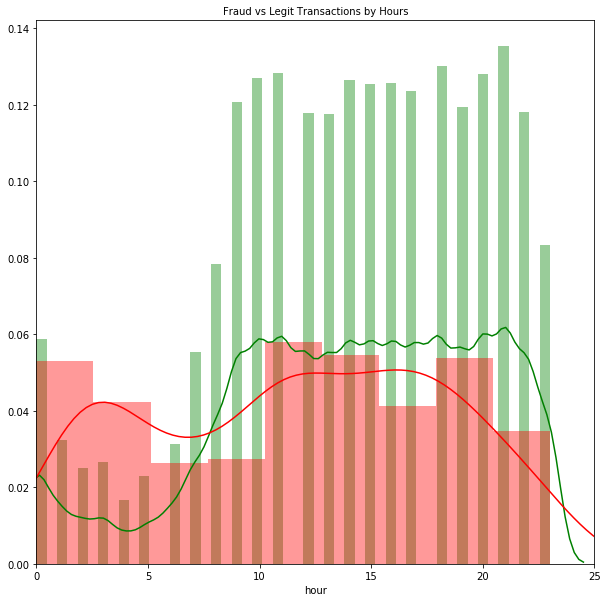

In [48]:
plt.figure(figsize=(10,10)) # tuple of the figure size
# seaborn as sns
sns.distplot(df[df['Class'] == 0]["hour"], color='g') # Genuine - green
sns.distplot(df[df['Class'] == 1]["hour"], color='r') # Fraudulent - Red
plt.title('Fraud vs Legit Transactions by Hours', fontsize=10)
plt.xlim([0,25])
plt.show()

In [49]:
# with a very small confidence we may say that Fraud transactions are more frequent towards the night

In [50]:
# Observing patterns in No of Legit Transactions vs Time (Hour) to observe more
legit_hour_count = df[df['Class']==0].groupby(['hour'] , as_index = False)['hour'].size().reset_index(name = 'Count')
legit_hour_count

,hour,Count
0,0,7638
1,1,4198
2,2,3257
3,3,3470
4,4,2176
5,5,2976
6,6,4069
7,7,7206
8,8,10214
9,9,15721


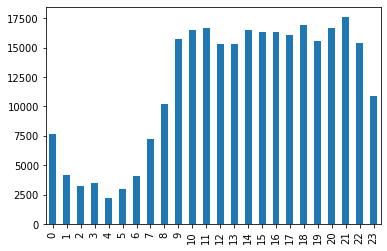

In [51]:
legit_hour_count['Count'].plot(kind = 'bar')
plt.show()

In [52]:
# Observing patterns in No of Fraud Transactions vs Time (Hour) to observe more
fraud_hour_count = df[df['Class']==1].groupby(['hour'] , as_index = False)['hour'].size().reset_index(name = 'Count')
fraud_hour_count

,hour,Count
0,0,6
1,1,10
2,2,48
3,3,17
4,4,23
5,5,11
6,6,9
7,7,23
8,8,9
9,9,16


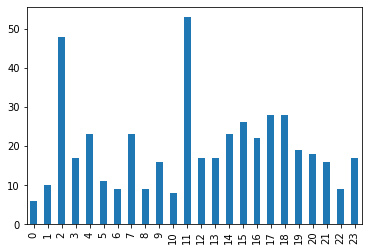

In [53]:
fraud_hour_count['Count'].plot(kind = 'bar')
plt.show()

# Comparing Amount and Transaction Class

In [54]:
# We need to bin amounts first , but the problem is the skewness of the amount
# non fraud
df[df['Class']==0]['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
283432      0.77
283433     24.79
283434     67.88
283435     10.00
283436    217.00
Name: Amount, Length: 282964, dtype: float64

In [55]:
# fraud
df[df['Class']==1]['Amount']

533         0.00
615       529.00
4883      239.93
6069       59.00
6290        1.00
           ...  
278529    390.00
278805      0.76
278811     77.89
279796    245.00
280324     42.53
Name: Amount, Length: 473, dtype: float64

In [56]:
# comparision
comp_df = pd.DataFrame([df[df['Class']==0]['Amount'].describe().to_dict() , df[df['Class']==1]['Amount'].describe().to_dict()])
comp_df=comp_df.T
comp_df.columns = ['Legit' , 'Fraud']
comp_df

,Legit,Fraud
count,282964.000000,473.000000
mean,83.932832,123.871860
std,193.746484,260.211041
min,0.000000,0.000000
25%,5.630000,1.000000
50%,22.000000,9.820000
75%,77.000000,105.890000
max,2992.050000,2125.870000


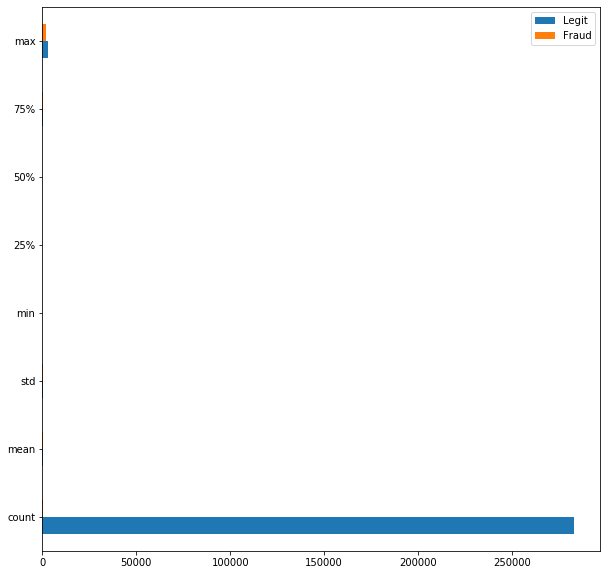

In [57]:
comp_df.plot(kind = 'barh' , figsize = (10,10))
plt.show()

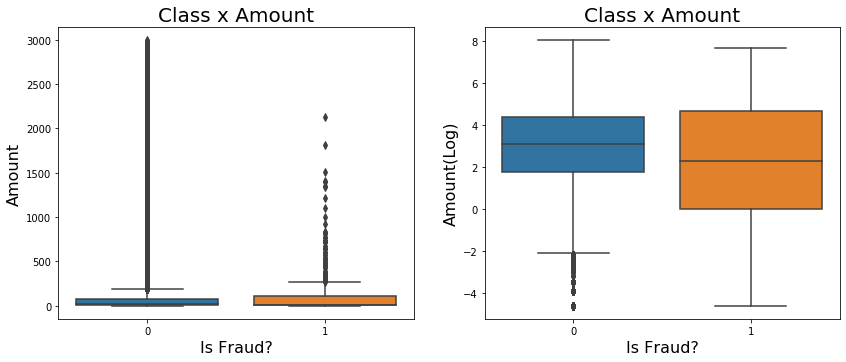

In [58]:
#Feature engineering to a better visualization of the values
df['amount_log'] = np.log(df.Amount + 0.01)
plt.figure(figsize=(14,6))
# Let's explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount", data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)
plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)
plt.subplots_adjust(hspace = 0.6, top = 0.8)
plt.show()

In [59]:
#save this csv file
df.to_csv('data/elementary_data_processed.csv' , index = False)

# Done